<a href="https://colab.research.google.com/github/uchaiaye53/ML-AI-Lab/blob/main/Final-lab-assignments/AI_lab_2017831053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Load data

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/bank-data.zip', 'r') as zipObj:
      zipObj.extractall('bankDataset')

In [68]:
df = pd.read_csv('/content/bankDataset/bank-data/bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [69]:
df.shape

(45211, 17)

In [70]:
df.size
df.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [71]:
fieldnames = ['age',
              'job',
              'marital',
              'education',
              'default',
              'balance',
              'housing',
              'loan',
              'contact',
              'day',
              'month',
              'duration',
              'campaign',
              'pdays',
              'previous',
              'poutcome',
              'y']

# Convert To Values


In [72]:
def change_col_values(dataframe,key,old_values,new_values):
    for i in range(len(old_values)):
        dataframe[key].replace(old_values[i],new_values[i],inplace=True)
    return dataframe[key]

In [73]:
y_old = ['yes','no']
y_new = [1,0]
housing_old = ['yes','no']
housing_new = [1,0]
loan_old = ['yes','no']
loan_new = [1,0]
default_old = ['yes','no']
default_new = [1,0]

In [74]:
df[fieldnames[4]] = change_col_values(df,fieldnames[4],default_old,default_new)
df[fieldnames[6]] = change_col_values(df,fieldnames[6],housing_old,housing_new)
df[fieldnames[7]] = change_col_values(df,fieldnames[7],loan_old,loan_new)
df[fieldnames[16]] = change_col_values(df,fieldnames[16],y_old,y_new)

In [75]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
cat_ind_list = [1,2,3,8,10,15]
for item in cat_ind_list:
    df[fieldnames[item]] = tenc.fit_transform(df[fieldnames[item]],df['y'])

In [76]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.137556,0.101235,0.150064,0,2143,1,0,0.040707,5,0.067195,261,1,-1,0,0.091615,0
1,44,0.110570,0.149492,0.105594,0,29,1,0,0.040707,5,0.067195,151,1,-1,0,0.091615,0
2,33,0.082717,0.101235,0.105594,0,2,1,1,0.040707,5,0.067195,76,1,-1,0,0.091615,0
3,47,0.072750,0.101235,0.135703,0,1506,1,0,0.040707,5,0.067195,92,1,-1,0,0.091615,0
4,33,0.118056,0.149492,0.135703,0,1,0,0,0.040707,5,0.067195,198,1,-1,0,0.091615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.110570,0.101235,0.150064,0,825,0,0,0.149189,17,0.101511,977,3,-1,0,0.091615,1
45207,71,0.227915,0.119455,0.086265,0,1729,0,0,0.149189,17,0.101511,456,2,-1,0,0.091615,1
45208,72,0.227915,0.101235,0.105594,0,5715,0,0,0.149189,17,0.101511,1127,5,184,3,0.647253,1
45209,57,0.072750,0.101235,0.105594,0,668,0,0,0.134205,17,0.101511,508,4,-1,0,0.091615,0


# SPLIT

In [77]:
X = df.drop(['y'], axis=1)

y = df['y']

# Split into train and test data

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [79]:
X_train.shape, X_test.shape

((36168, 16), (9043, 16))

# Feature Scaling

In [80]:
cols = X_train.columns

In [81]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [82]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [83]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [84]:
X_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04
mean,-2.876119e-16,-1.233745e-16,1.592474e-15,1.434130e-16,9.036985e-18,2.121727e-17,2.161018e-18,9.626353e-17,1.792663e-16,-3.221881e-17,-2.882012e-16,-6.954549e-17,9.734404e-17,1.335902e-17,2.750387e-18,3.386905e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.160023e+00,-1.014971e+00,-7.452502e-01,-1.315603e+00,-1.360195e-01,-3.046241e+00,-1.114452e+00,-4.358125e-01,-1.575692e+00,-1.780339e+00,-5.936970e-01,-1.000005e+00,-5.678362e-01,-4.102219e-01,-2.414050e-01,-2.518490e-01
25%,-7.465292e-01,-6.681927e-01,-7.452502e-01,-4.884338e-01,-1.360195e-01,-4.217209e-01,-1.114452e+00,-4.358125e-01,-1.575692e+00,-9.389195e-01,-5.936970e-01,-6.003899e-01,-5.678362e-01,-4.102219e-01,-2.414050e-01,-2.518490e-01
50%,-1.811316e-01,-1.494797e-01,-7.452502e-01,-4.884338e-01,-1.360195e-01,-2.994314e-01,8.973019e-01,-4.358125e-01,6.591595e-01,2.270253e-02,-1.842937e-01,-3.016481e-01,-2.442785e-01,-4.102219e-01,-2.414050e-01,-2.518490e-01
75%,6.669648e-01,4.680663e-01,1.530054e+00,1.414550e+00,-1.360195e-01,1.975381e-02,8.973019e-01,-4.358125e-01,6.591595e-01,6.237163e-01,-8.143793e-02,2.337591e-01,7.927914e-02,-4.102219e-01,-2.414050e-01,-2.518490e-01
max,5.095913e+00,3.882977e+00,1.530054e+00,1.414550e+00,7.351886e+00,3.268239e+01,8.973019e-01,2.294565e+00,6.591595e-01,1.825744e+00,4.807322e+00,1.808067e+01,1.949274e+01,8.318318e+00,1.134884e+02,5.347096e+00


# Run SVM 

In [85]:
svc=SVC() 
svc.fit(X_train,y_train) #Default parameters
y_pred=svc.predict(X_test)
print('Accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score : 0.8983


# Check overfitting and underfitting

In [86]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9117
Test set score: 0.8983


# Confusion Matrix

In [87]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7760  220]
 [ 700  363]]

True Positives(TP) =  7760

True Negatives(TN) =  363

False Positives(FP) =  220

False Negatives(FN) =  700


<AxesSubplot:>

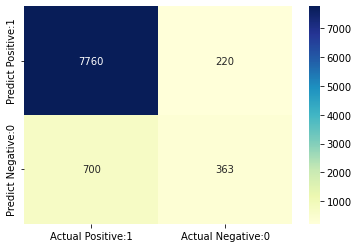

In [88]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Report

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [90]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.8983
Classification error : 0.1017
Precision : 0.9724
Recall or Sensitivity : 0.9173
True Positive Rate : 0.9173
False Positive Rate : 0.3774
